In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

2023-11-22 12:58:20.119349: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 12:58:20.190409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 12:58:21.137465: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-22 12:58:22.357079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

Tensorflow recognized 1 GPUs


2023-11-22 12:58:22.456747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 12:58:22.457088: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 12:58:22.460169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Load DNN Model

Check the model structure, especially the output layer, which is 10

In [2]:
model_mnist = keras.models.load_model('models/cnnClassifier.h5')
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Load Data



In [3]:
from population import load_mnist_test
import random
popsize = 10

for number in range(10):
    x_test, y_test = load_mnist_test(popsize, number)
    #print(x_test[i])
    print(f"Label: {number}")
    image = x_test[random.randint(0, popsize-1)]
    input = np.reshape(image, (1, 28, 28))
    print(f"Prediction: {model_mnist.predict(input)}")
    

Loaded model from disk
Label: 0


2023-11-22 12:58:25.980381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8906


1/1 [==============================] - 2s 2s/step
Prediction: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Label: 1
1/1 [==============================] - 0s 32ms/step


2023-11-22 12:58:26.256770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Prediction: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Label: 2
1/1 [==============================] - 0s 29ms/step
Prediction: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Label: 3
1/1 [==============================] - 0s 30ms/step
Prediction: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 7.5783347e-26 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]]
Label: 4
1/1 [==============================] - 0s 33ms/step
Prediction: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Label: 5
1/1 [==============================] - 0s 32ms/step
Prediction: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Label: 6
1/1 [==============================] - 0s 30ms/step
Prediction: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Label: 7
1/1 [==============================] - 0s 27ms/step
Prediction: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Label: 8
1/1 [==============================] - 0s 30ms/step
Prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Label: 9
1/1 [==============================] - 0s 31ms/step
Prediction: [[0. 0. 0. 0. 0. 0. 

In [4]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

from tf_keras_vis.utils.scores import CategoricalScore



## Vanilla Saliency

`Saliency` generates a saliency map that appears the regions of ​​the input image that contributes the most to the output value.

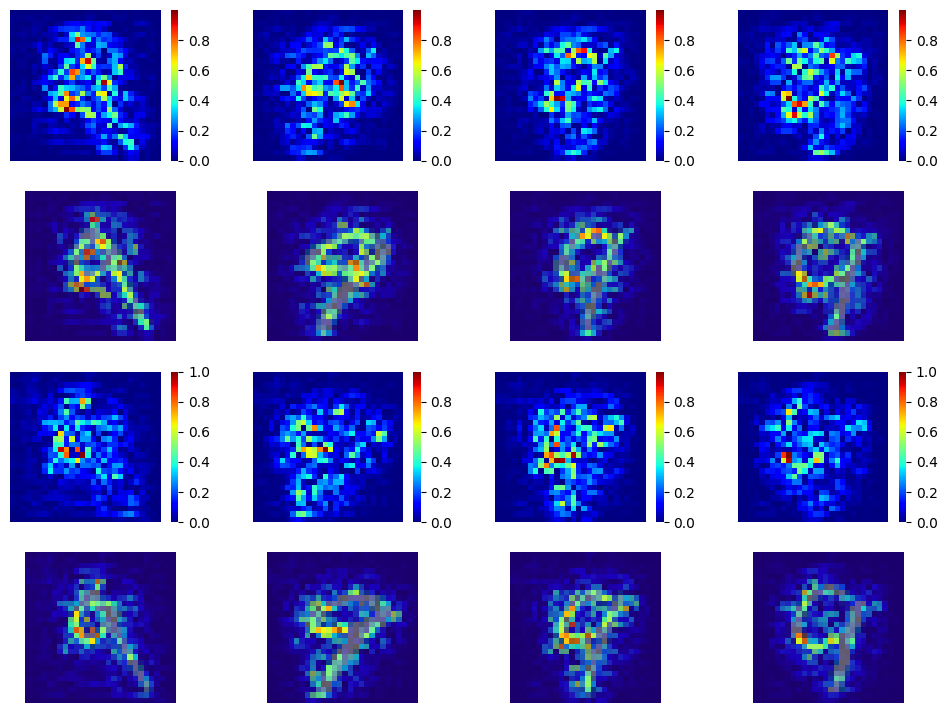

<Figure size 900x1000 with 0 Axes>

In [5]:
import seaborn as sns

# generate input 
%matplotlib inline

popsize = 4
number = 9
number_wrong = 7
score = CategoricalScore(number)
score_wrong = CategoricalScore([number_wrong])

def get_input(num, popsize):
    x_test, y_test = load_mnist_test(popsize, num)

    X = np.reshape(x_test, (popsize, 28, 28, 1))
    X = X.astype('float32')
    # X /= 255.0
    return X

X = get_input(number, popsize)

# from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model_mnist,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, X)

# Generate saliency map
saliency_map_wrong = saliency(score_wrong, X)

def plot_all(saliency_map,saliency_map_wrong, X, popsize = popsize):
    # Render
    rows = 4
    f, ax = plt.subplots(nrows=rows, ncols=popsize, figsize=(12, 9))
    fig = plt.figure(figsize=(9, 10))
    row = 0
    for i in range(popsize):
        sns.heatmap(saliency_map[i], ax=ax[row, i], square=True, cmap="jet")
        #ax[row, i].imshow(saliency_map[i], cmap="jet")
        ax[row, i].axis('off')
    
    row += 1
    for i in range(popsize):
        ax[row, i].imshow(X[i])
        ax[row, i].imshow(saliency_map[i], cmap='jet', alpha = 0.6)
        ax[row, i].axis('off')
    
    row += 1
    for i in range(popsize):
        sns.heatmap(saliency_map_wrong[i], ax=ax[row, i], square=True, cmap="jet")
        #ax[row, i].imshow(saliency_map_wrong[i], cmap="jet")
        ax[row, i].axis('off')
    
    row += 1
    for i in range(popsize):
        ax[row, i].imshow(X[i])
        ax[row, i].imshow(saliency_map_wrong[i], cmap='jet', alpha = 0.6)
        ax[row, i].axis('off')
    plt.tight_layout()

plot_all(saliency_map,saliency_map_wrong, X)

## SmoothGrad

As you can see above, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce the noise in saliency map by adding noise to input image.

**Note:** Because SmoothGrad calculates the gradient repeatedly, it might take much time around 2-3 minutes when using CPU.

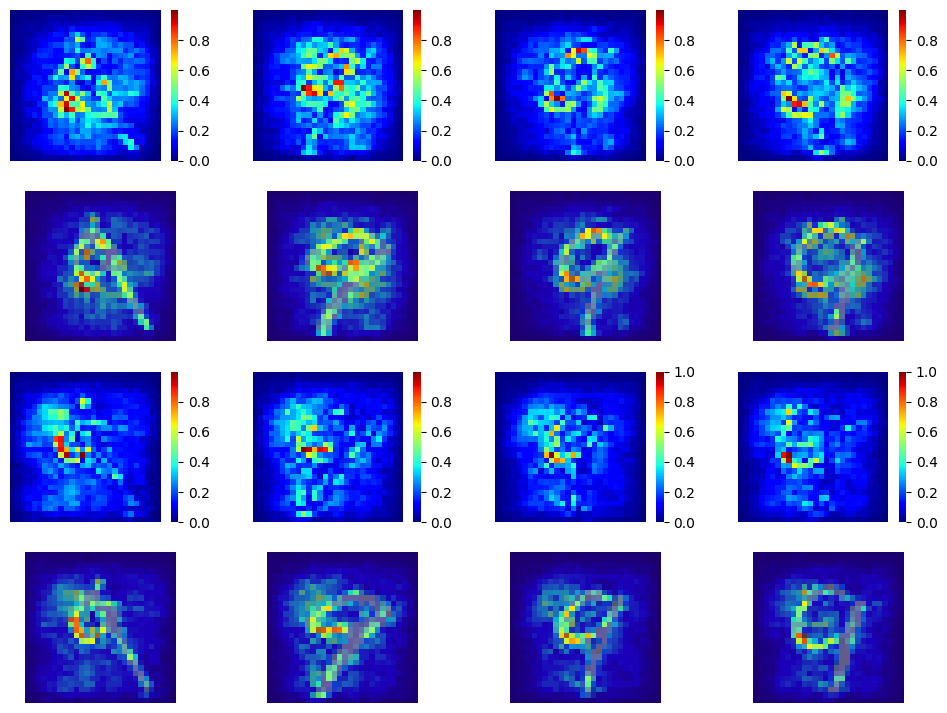

<Figure size 900x1000 with 0 Axes>

In [6]:
number = 9
number_wrong = 7
score = CategoricalScore([number])
score_wrong = CategoricalScore(number_wrong)
X = get_input(number, popsize)

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.
saliency_map_wrong = saliency(score_wrong,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.
## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
plot_all(saliency_map,saliency_map_wrong, X)

## GradCAM

Saliency is one of useful way of visualizing attention that appears the regions of the input image that contributes the most to the output value.
GradCAM is another way of visualizing attention over input. Instead of using gradients of model outputs, it uses of penultimate layer output (that is the convolutional layer just before Dense layers).

1.0


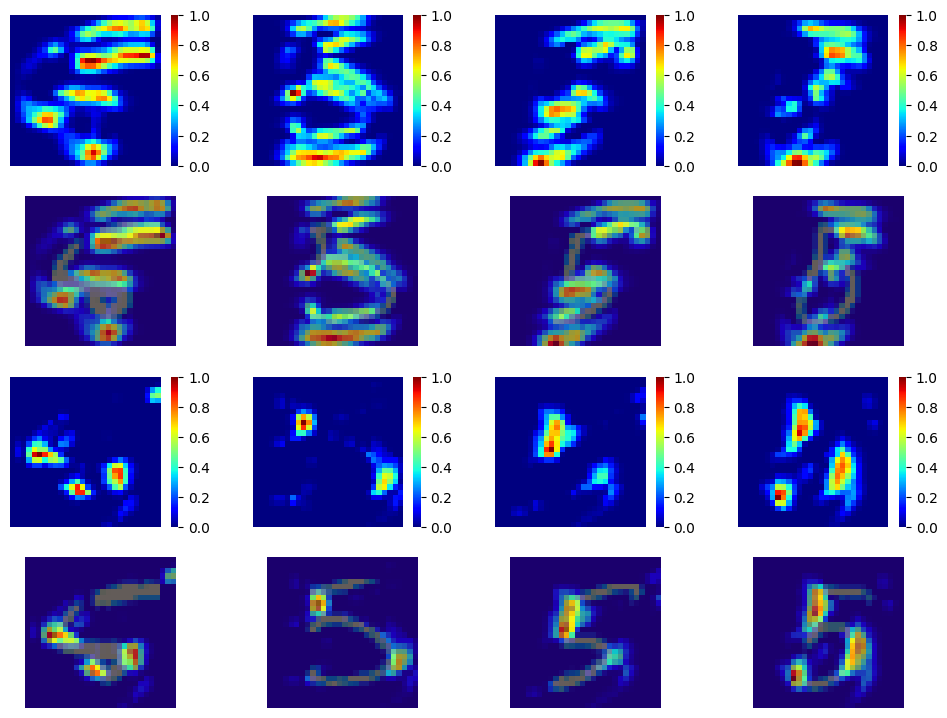

<Figure size 900x1000 with 0 Axes>

In [7]:
number = 5
number_wrong = 0
score = CategoricalScore(number)
score_wrong = CategoricalScore(number_wrong)
X = get_input(number, popsize)
X *= 2.0

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model_mnist,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              X,
              penultimate_layer=-1)

cam_wrong = gradcam(score_wrong,
              X,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
plot_all(cam, cam_wrong, X)

print(np.max(np.abs(cam-cam_wrong)))

## GradCAM++

GradCAM++ can provide better visual explanations of CNN model predictions.

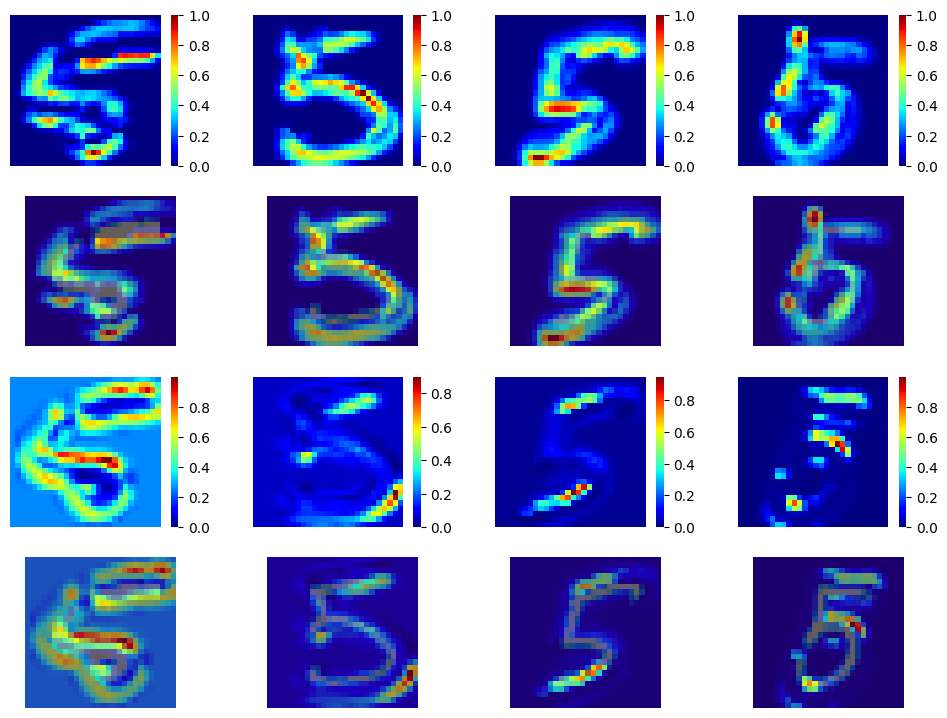

<Figure size 900x1000 with 0 Axes>

In [8]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus


number = 5
number_wrong = 0
score = CategoricalScore([number])
score_wrong = CategoricalScore(number_wrong)
X = get_input(number, popsize)
# NOTE for GradCAM++ input must be normalized !!!
X /= 255.0

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model_mnist,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score,
              X,
              penultimate_layer=-1)
cam_wrong = gradcam(score_wrong,
              X,
              penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
plot_all(cam, cam_wrong, X)

## Observation
Although the visualized attentions almost completely cover the target objects,
the more interesting thing is, when the wrong channel is used, the backgroud areas in attention map are no longer 0, which even increase to 0.3. While, some areas near the digits decrease to 0. 

This phenomenon has been observed before...

# ScoreCAM

In the end, Here, we show you ScoreCAM. It is an another method that generates Class Activation Map. The characteristic of this method is that it's the `gradient-free` method unlike GradCAM, GradCAM++ or Saliency.

8/8 [==============================] - 0s 6ms/step


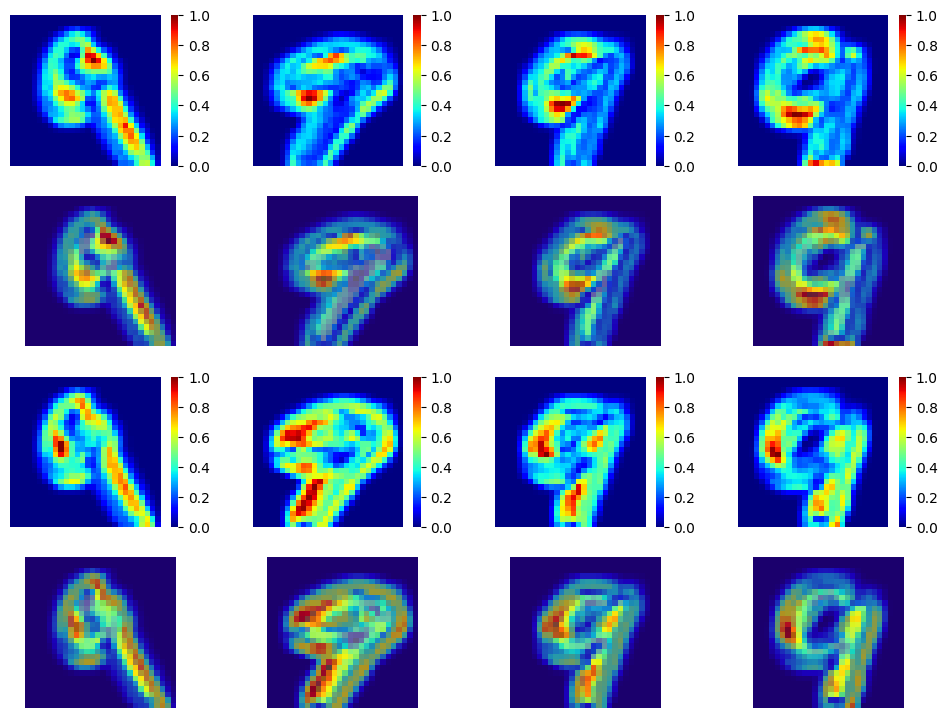

<Figure size 900x1000 with 0 Axes>

In [9]:
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

number = 9
number_wrong = 7
score = CategoricalScore([number])
score_wrong = CategoricalScore(number_wrong)
X = get_input(number, popsize)
# NOTE for GradCAM++ input must be normalized !!!
#X /= 55.0


# Create ScoreCAM object
scorecam = Scorecam(model_mnist)

# Generate heatmap with ScoreCAM
cam = scorecam(score, X, penultimate_layer=-1)
cam_wrong = scorecam(score_wrong, X, penultimate_layer=-3)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
plot_all(cam, cam_wrong, X)

## Faster-ScoreCAM

ScoreCAM is a great method, however, it takes a bit more time to process it than other cam methods.
There is a good news for us. Faster-ScorecAM that makes ScoreCAM to be more efficient was devised by @tabayashi0117.

https://github.com/tabayashi0117/Score-CAM/blob/master/README.md#faster-score-cam

> We thought that several channels were dominant in generating the final heat map. Faster-Score-CAM adds the processing of “use only channels with large variances as mask images” to Score-CAM. (max_N = -1 is the original Score-CAM).


3/3 [==============================] - 0s 4ms/step


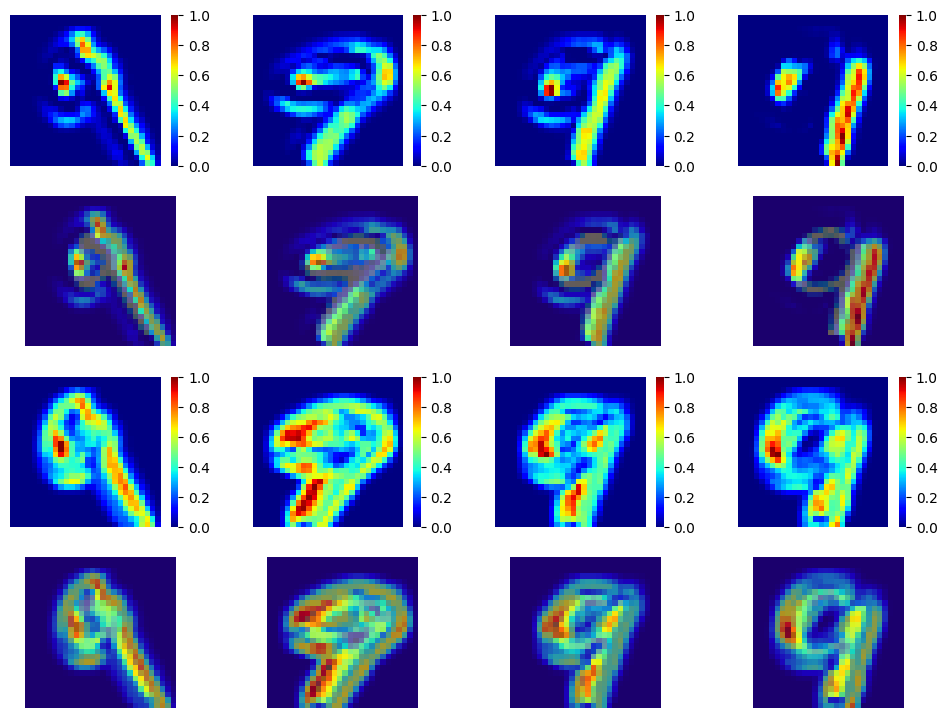

<Figure size 900x1000 with 0 Axes>

In [10]:

from tf_keras_vis.scorecam import Scorecam

number = 9
number_wrong = 7
score = CategoricalScore([number])
score_wrong = CategoricalScore(number_wrong)
X = get_input(number, popsize)
# NOTE for GradCAM++ input must be normalized !!!


# Create ScoreCAM object
scorecam = Scorecam(model_mnist, model_modifier=replace2linear)

# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score,
               X,
               penultimate_layer=-1,
               max_N=10)
cam = scorecam(score_wrong,
               X,
               penultimate_layer=-1,
               max_N=10)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
plot_all(cam, cam_wrong, X)

In [11]:
print(cam[0,0:5,0:5])
print(cam[1,0:5,0:5])

[[0.00029377 0.00029377 0.00029377 0.00029377 0.00029377]
 [0.00029377 0.00029377 0.00029377 0.00029377 0.00029377]
 [0.00029377 0.00029377 0.00029377 0.00029377 0.00029377]
 [0.00029377 0.00029377 0.00029377 0.00029377 0.00029377]
 [0.00029377 0.00029377 0.00029377 0.00029377 0.00029377]]
[[7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21]
 [7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21]
 [7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21]
 [7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21]
 [7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21 7.4335846e-21]]


3/3 [==============================] - 0s 5ms/step


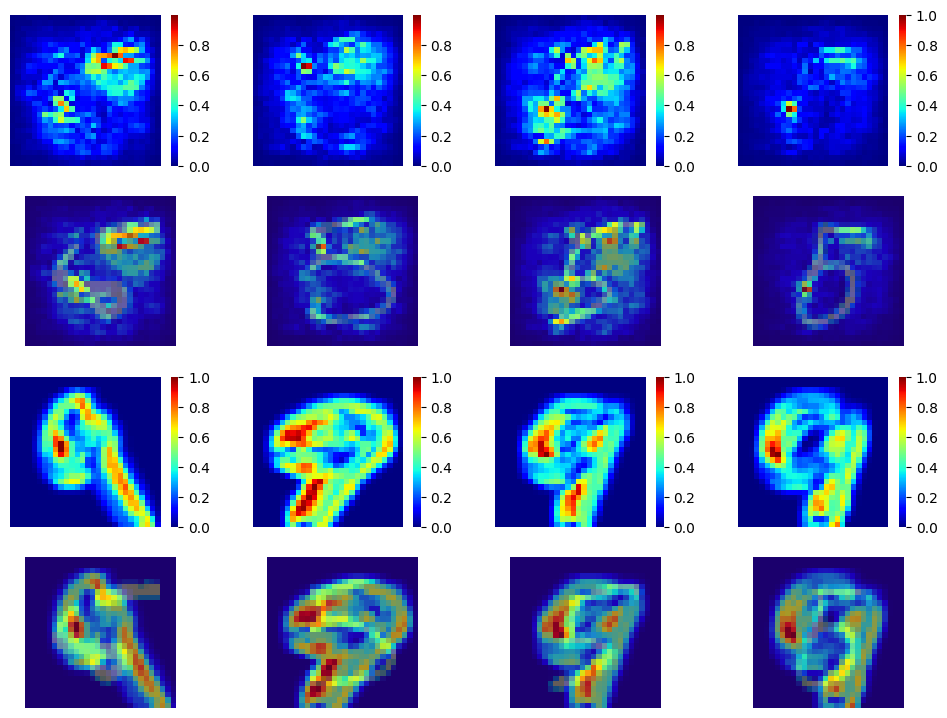

<Figure size 900x1000 with 0 Axes>

In [16]:
from attention_manager import AttentionManager
number = 5
ATTENTION = "SmoothGrad" #"SmoothGrad"|"VanillaSaliency"|"GradCAM"|"GradCAM++"|"ScoreCAM"|"Faster-ScoreCAM"|
attention = AttentionManager(num = number)
X = get_input(number, popsize)
cam = attention.compute_attention_maps(X, ATTENTION,popsize)
plot_all(cam, cam_wrong, X)